In [8]:
!pip install statsmodels
!pip install --upgrade statsmodels
!pip install openpyxl
!pip install numpy

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA



In [10]:
datos = pd.read_excel("C:/Users/casa/Downloads/datos/mensuales/mensuales.xlsx")
datos.columns=('Fecha','Precipitacion')
datos.set_index('Fecha', inplace=True)
print(datos.head())

            Precipitacion
Fecha                    
1982-01-01          766.0
1982-02-01         2718.0
1982-03-01         1331.0
1982-04-01         4939.0
1982-05-01         6078.0


In [11]:
precipitacion = datos['Precipitacion']


# Verificar las primeras filas para asegurar que está correcto
print(precipitacion.head())

Fecha
1982-01-01     766.0
1982-02-01    2718.0
1982-03-01    1331.0
1982-04-01    4939.0
1982-05-01    6078.0
Name: Precipitacion, dtype: float64


In [12]:
datos.shape


(492, 1)

In [13]:
# Suponiendo que 'datos' es tu DataFrame
# Imprime las primeras filas del DataFrame para verificar la estructura de los datos
print("Estructura de 'datos':")
print(datos.head())

# Asegúrate de que 'Fecha' esté en el formato correcto (sin espacios adicionales, etc.)
datos.columns = datos.columns.str.strip()

# Verifica nuevamente las columnas después de limpiar los nombres
print("Columnas después de limpiar:", datos.columns)

# Intenta establecer 'Fecha' como índice del DataFrame
if 'Fecha' in datos.columns:
    datos.set_index('Fecha', inplace=True)
else:
    print("No se encontró la columna 'Fecha' en 'datos'. Verifica la estructura de tus datos.")

# Verifica el índice después de establecerlo
print("Índice del DataFrame 'datos':")
print(datos.index)

Estructura de 'datos':
            Precipitacion
Fecha                    
1982-01-01          766.0
1982-02-01         2718.0
1982-03-01         1331.0
1982-04-01         4939.0
1982-05-01         6078.0
Columnas después de limpiar: Index(['Precipitacion'], dtype='object')
No se encontró la columna 'Fecha' en 'datos'. Verifica la estructura de tus datos.
Índice del DataFrame 'datos':
DatetimeIndex(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
               '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
               '1982-09-01', '1982-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='Fecha', length=492, freq=None)


In [14]:

print(datos.head)

<bound method NDFrame.head of             Precipitacion
Fecha                    
1982-01-01          766.0
1982-02-01         2718.0
1982-03-01         1331.0
1982-04-01         4939.0
1982-05-01         6078.0
...                   ...
2022-08-01         5353.0
2022-09-01         4017.0
2022-10-01         3668.0
2022-11-01          461.0
2022-12-01         1002.0

[492 rows x 1 columns]>


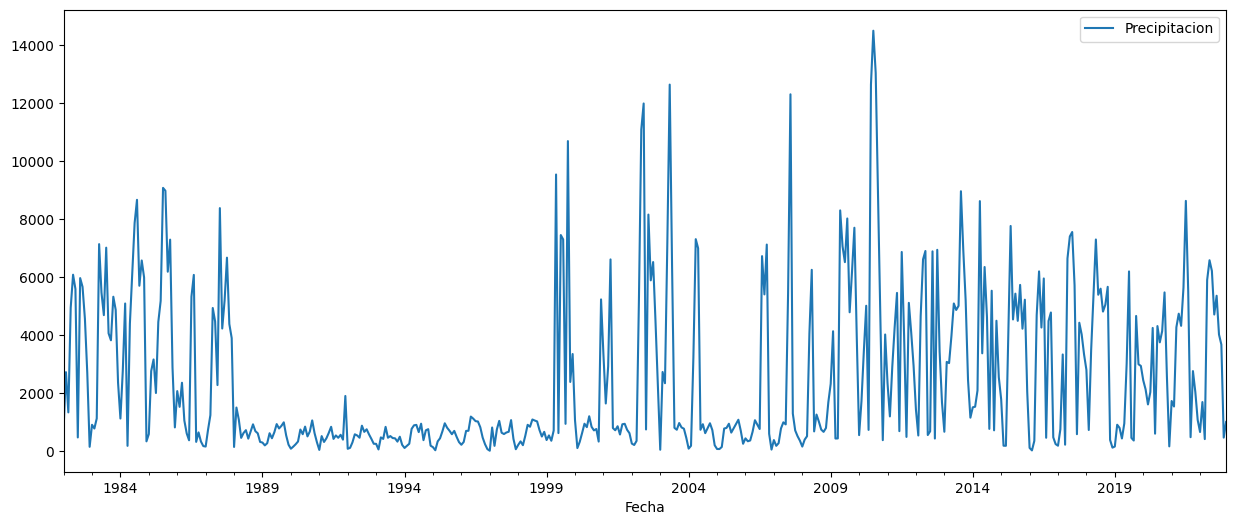

In [15]:
datos.plot(figsize=(15, 6))
plt.show()

In [36]:

modelo = ARIMA(precipitacion, order=(12, 1, 12))
modelo_ajustado = modelo.fit()

# Predice las precipitaciones para los próximos 12 meses (año 2023)
predicciones = modelo_ajustado.forecast(steps=12)  

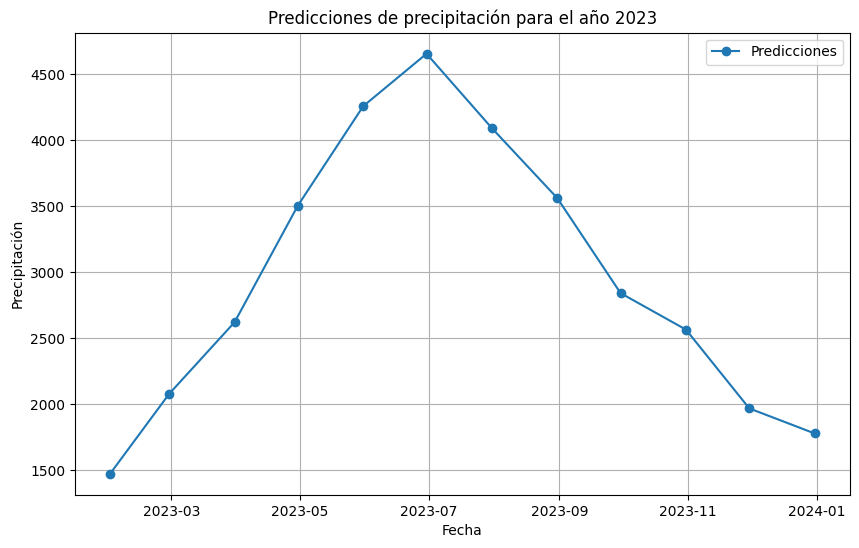

In [34]:
import matplotlib.pyplot as plt

# Crear un rango de fechas para los 12 meses del año 2023
fechas_2023 = pd.date_range(start="2023-01-01", periods=12, freq="ME")

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(fechas_2023, predicciones, marker="o", label="Predicciones")
plt.xlabel("Fecha")
plt.ylabel("Precipitación")
plt.title("Predicciones de precipitación para el año 2023")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
fechas_2023 = pd.date_range(start="2023-01-01", periods=12, freq="M")
tabla_predicciones = pd.DataFrame({"Fecha": fechas_2023, "Predicción": predicciones})

# Imprimir la tabla
print(tabla_predicciones)

                Fecha   Predicción
2023-01-01 2023-01-31  1044.544555
2023-02-01 2023-02-28  1739.301454
2023-03-01 2023-03-31  2353.873097
2023-04-01 2023-04-30  3204.518273
2023-05-01 2023-05-31  4234.614273
2023-06-01 2023-06-30  5244.480353
2023-07-01 2023-07-31  4958.887560
2023-08-01 2023-08-31  4447.361583
2023-09-01 2023-09-30  3689.196360
2023-10-01 2023-10-31  3030.560311
2023-11-01 2023-11-30  2126.455653
2023-12-01 2023-12-31  1545.935470
